In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
train_images = r"C:\Users\Mehul\CNN\HAM10000_images_part_1"
test_images = r"C:\Users\Mehul\CNN\HAM10000_images_part_2"
data = pd.read_csv(r"C:\Users\Mehul\CNN\HAM10000_metadata.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [4]:
unique_counts = data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [5]:
data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [6]:
data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [7]:
data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [8]:
print(data.isnull().sum())


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


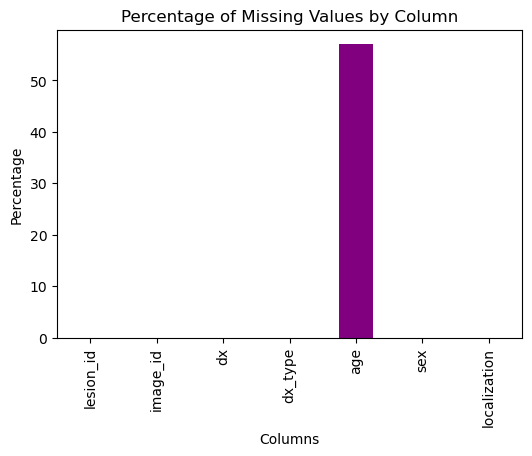

In [9]:
missing_values = data.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values)
plt.figure(figsize=(6, 4))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [10]:
# Define categorical and numerical columns
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']

In [11]:
#for column in categorical_columns:
    #print(data[column].value_counts())
    
data['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

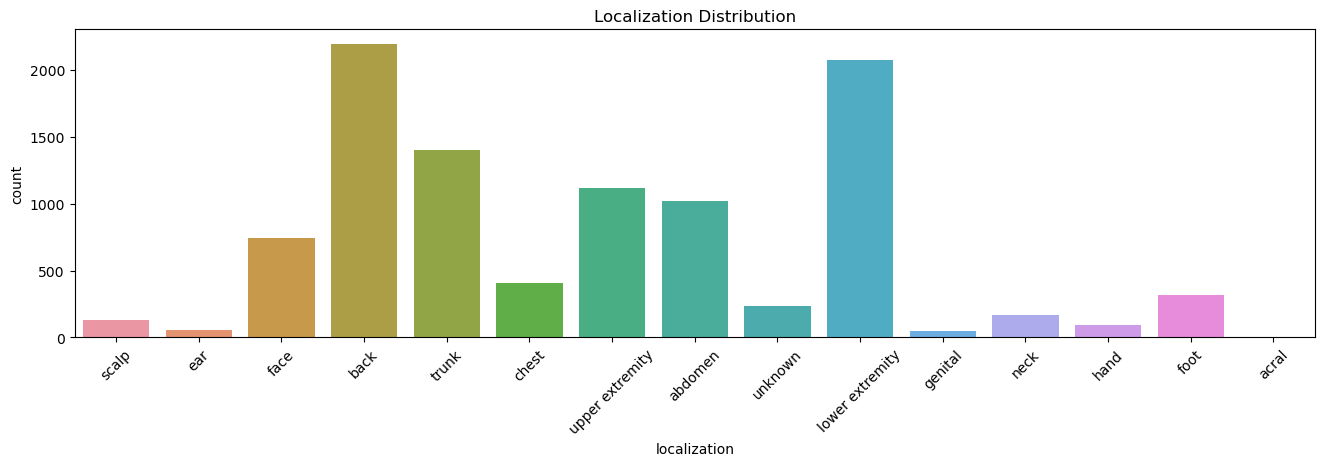

In [12]:
plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='localization')
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

In [13]:
data['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

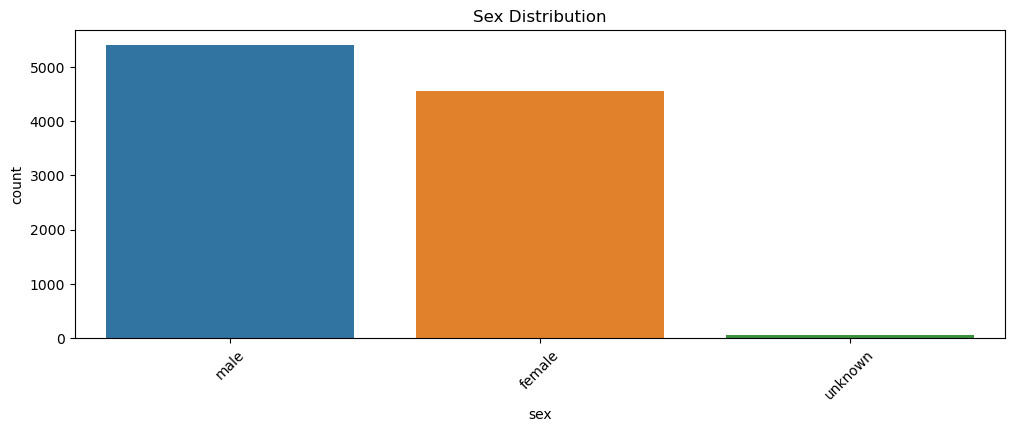

In [14]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='sex')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

In [15]:
data['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

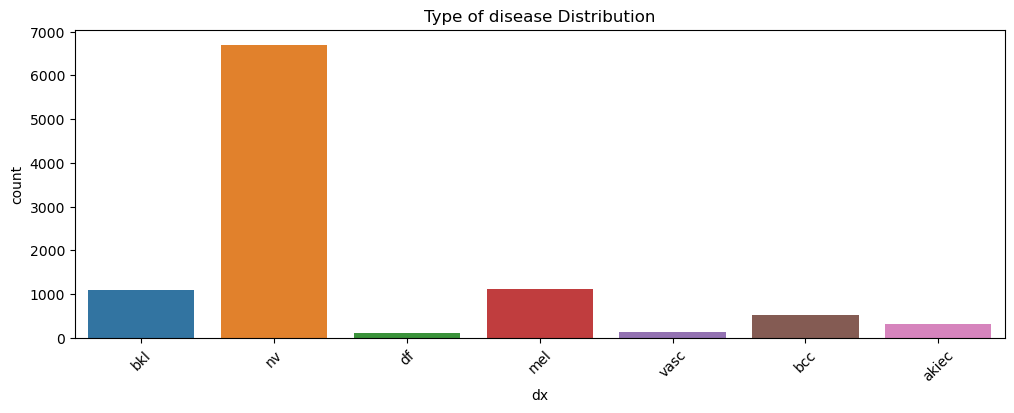

In [16]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='dx')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [17]:
data['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

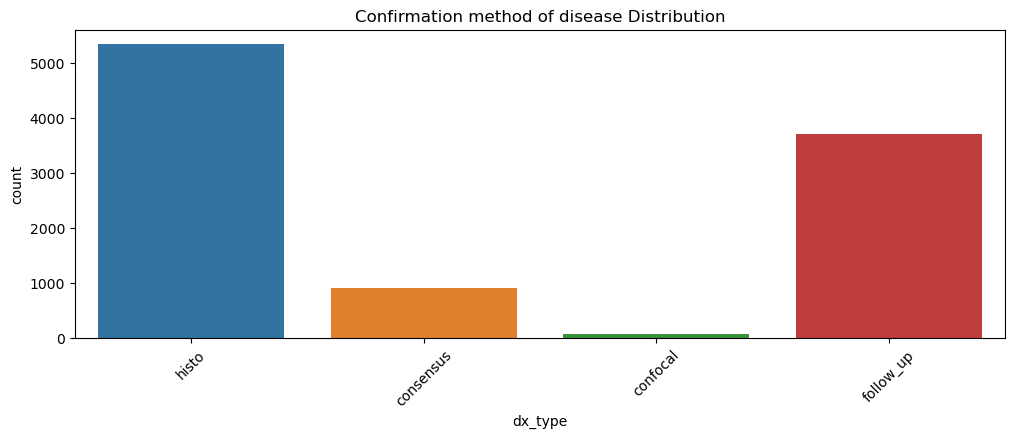

In [18]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='dx_type')
plt.title('Confirmation method of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Distribution of numerical columns
for column in numerical_columns:
    print(f"\nValue counts for {column}:")
    print(data[column].value_counts(dropna=False))  # Include NaN in counts


Value counts for age:
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
NaN       57
10.0      41
0.0       39
Name: count, dtype: int64


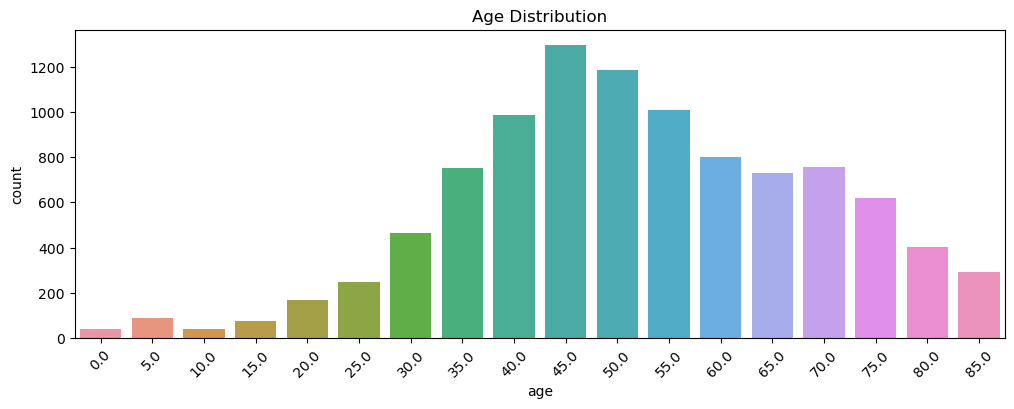

In [20]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='age')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

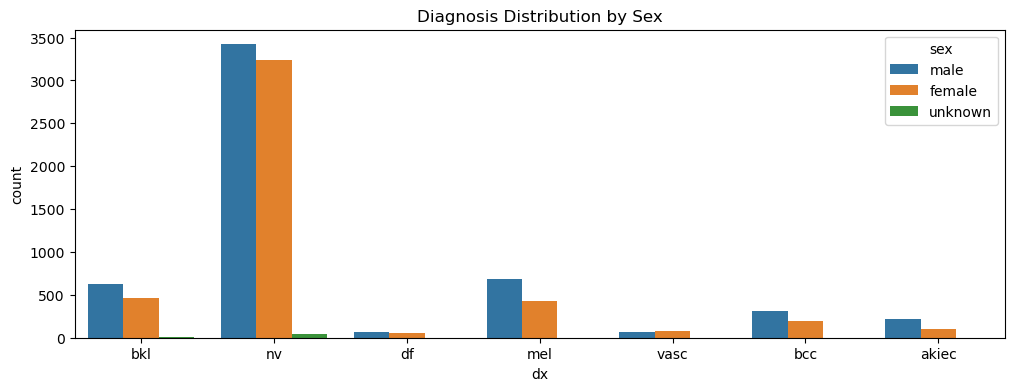

In [21]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='dx', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

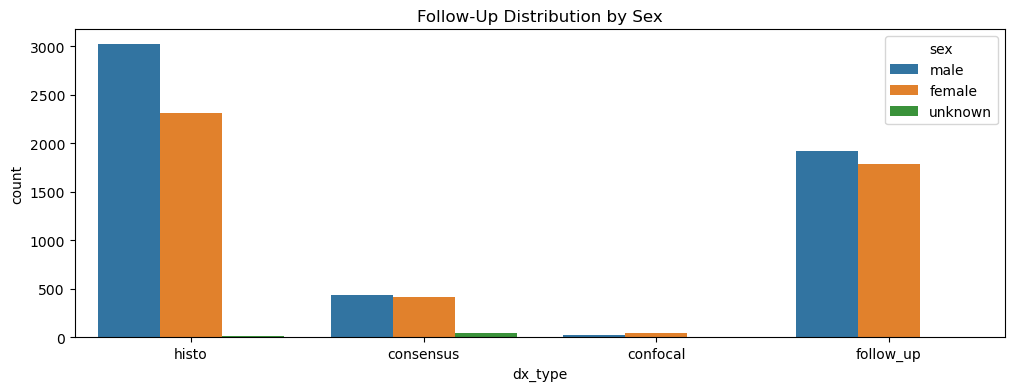

In [22]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='dx_type', hue='sex')
plt.title('Follow-Up Distribution by Sex')
plt.show()

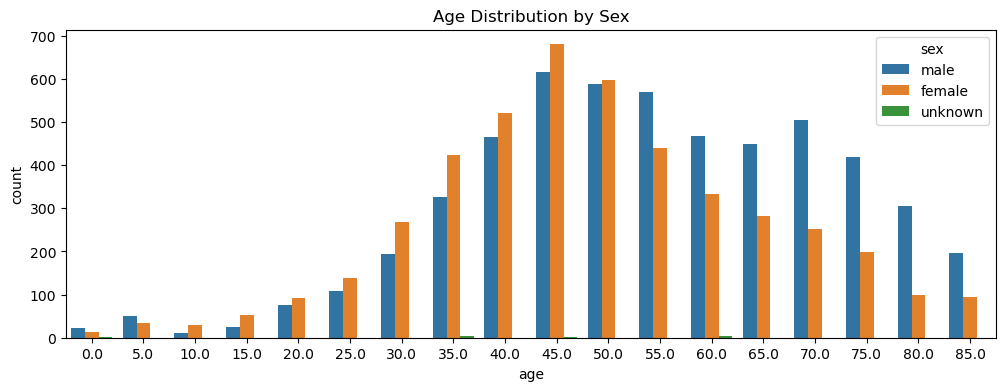

In [23]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='age', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

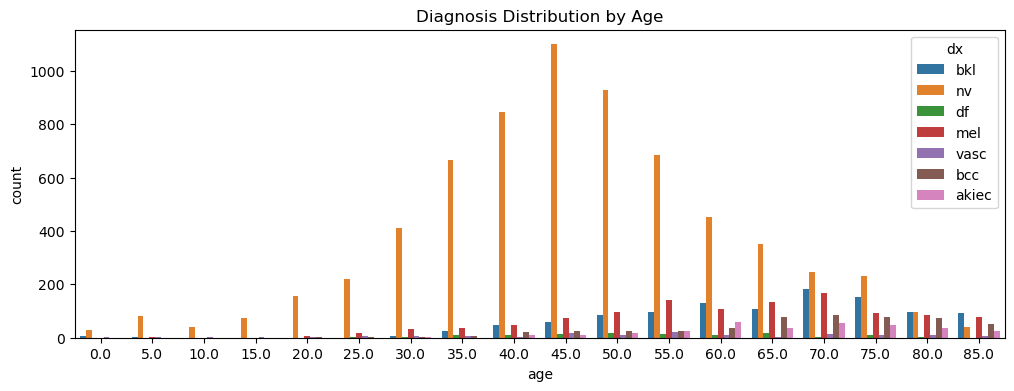

In [24]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='age', hue='dx')
plt.title('Diagnosis Distribution by Age')
plt.show()

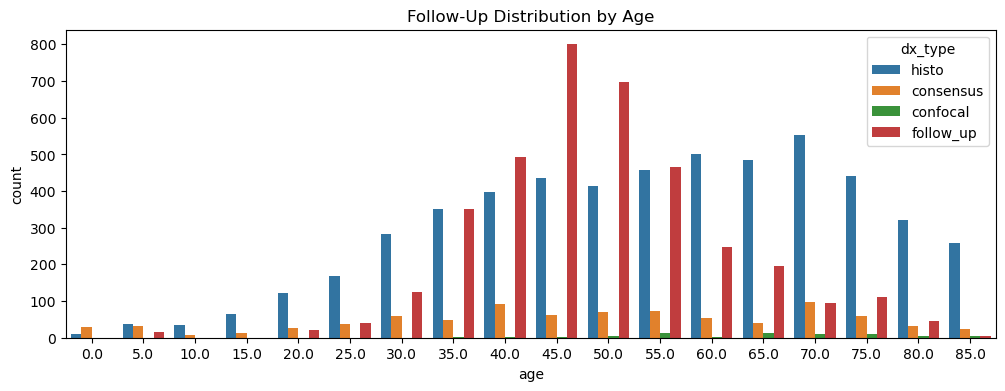

In [25]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='age', hue='dx_type')
plt.title('Follow-Up Distribution by Age')
plt.show()

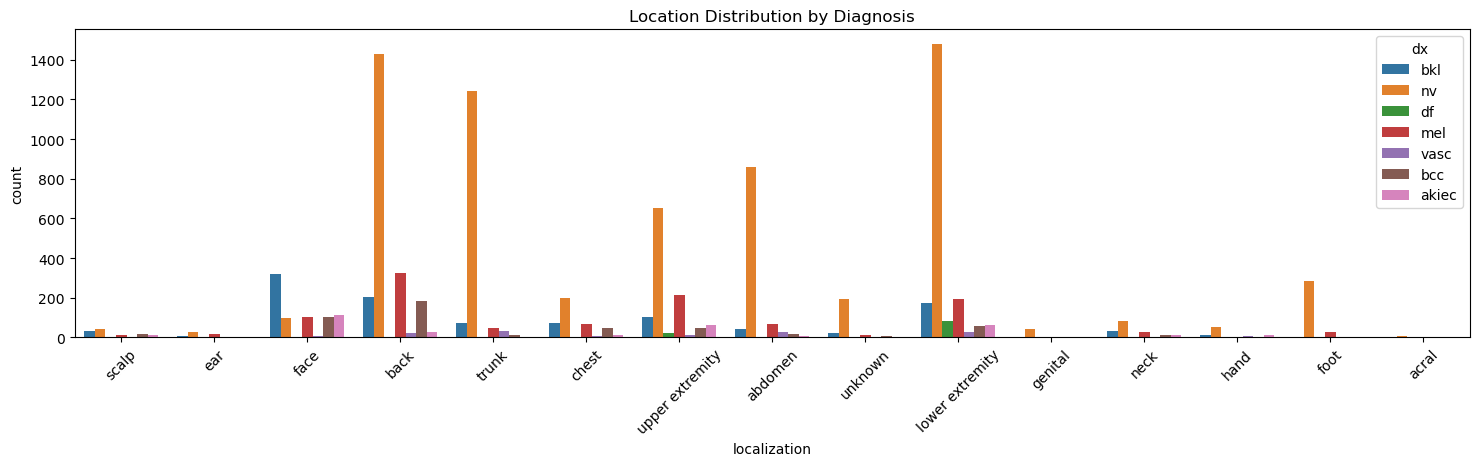

In [26]:
plt.figure(figsize=(18, 4))
sns.countplot(data=data, x='localization', hue='dx')
plt.title('Location Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

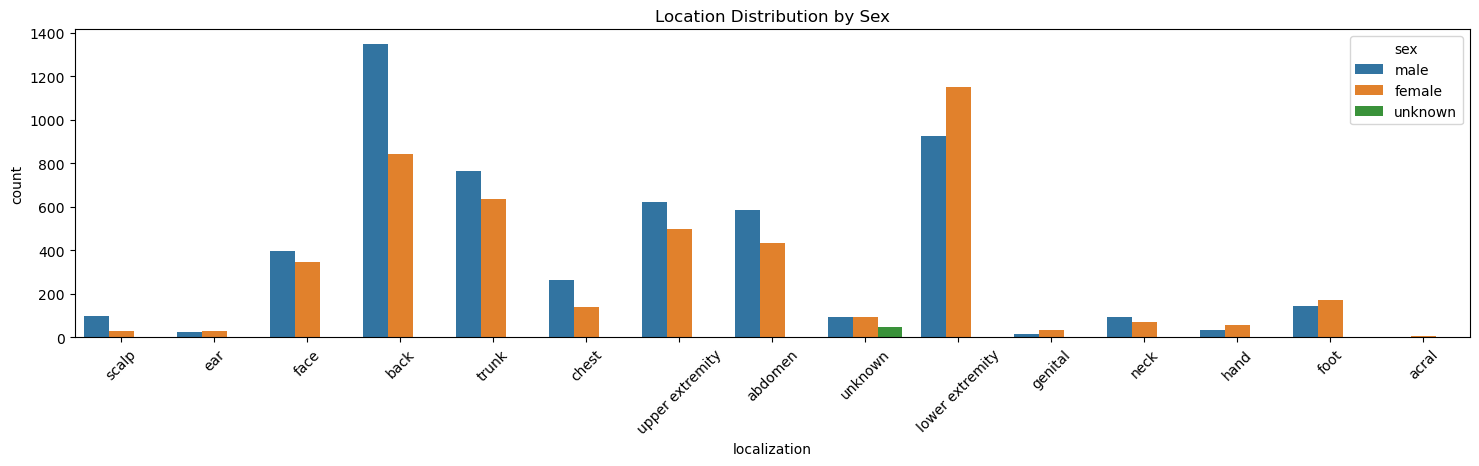

In [27]:
plt.figure(figsize=(18, 4))
sns.countplot(data=data, x='localization', hue='sex')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

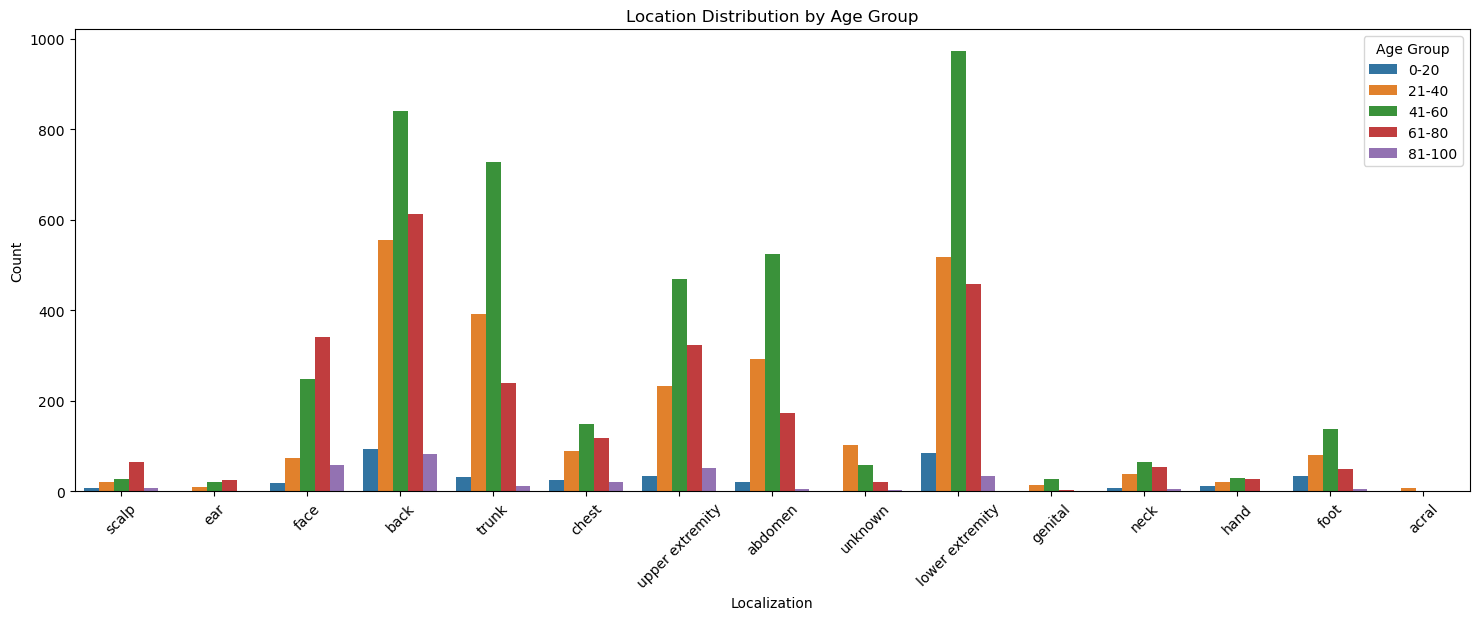

In [28]:
age_groups = pd.cut(data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Add the age groups as a new column in the DataFrame
data['age_group'] = age_groups

# Visualizing relationships between categorical columns and age groups
plt.figure(figsize=(18, 6))
sns.countplot(data=data, x='localization', hue='age_group')
plt.title('Location Distribution by Age Group')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

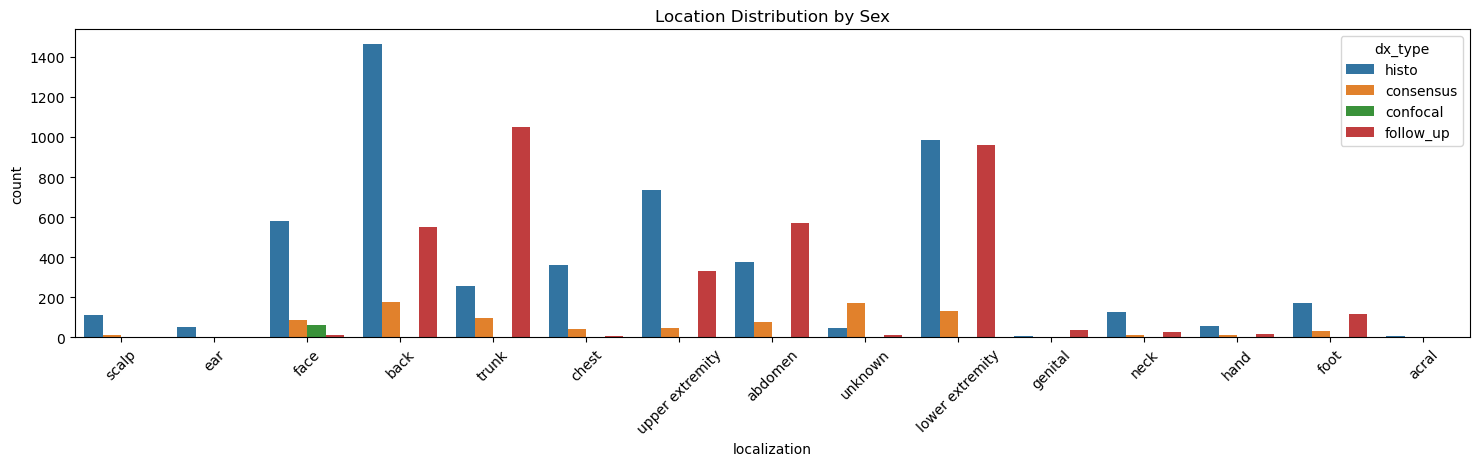

In [29]:
plt.figure(figsize=(18, 4))
sns.countplot(data=data, x='localization', hue='dx_type')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

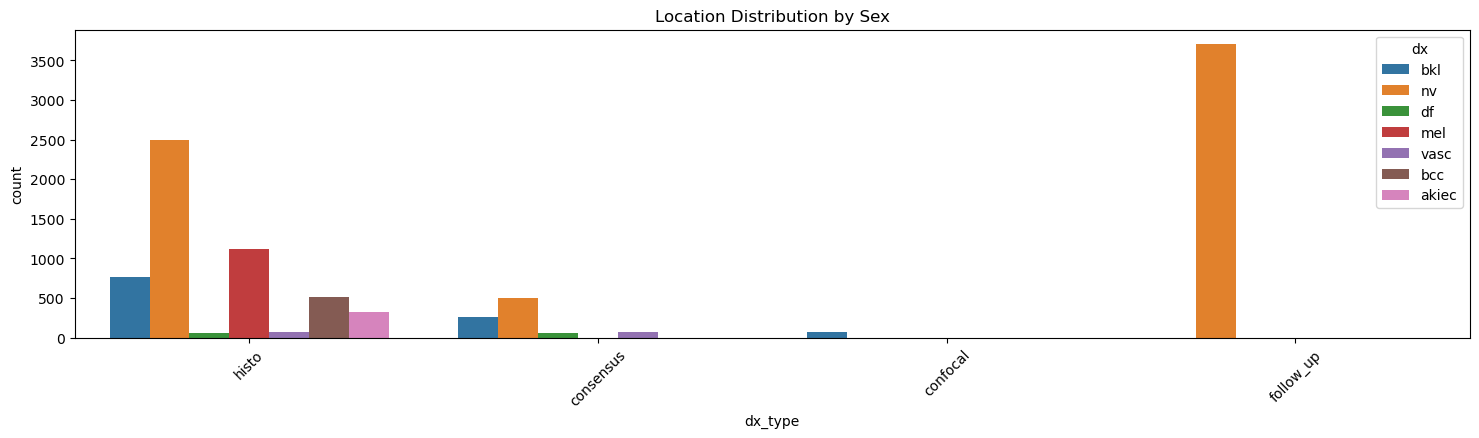

In [30]:
plt.figure(figsize=(18, 4))
sns.countplot(data=data, x='dx_type', hue='dx')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

In [31]:
data = data.drop_duplicates()
data = data.drop(columns=['age_group'])

In [32]:
median_age = data['age'].median()
data['age'] = data['age'].fillna(median_age)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [34]:
data = data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [36]:
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

# Create a new column with the updated diagnosis names
data['Updated_Diagnosis'] = data['Diagnosis'].map(diagnosis_mapping)

In [37]:
data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign Keratosis-Like Lesions


In [38]:
data['Age'] = data['Age'].astype(int)

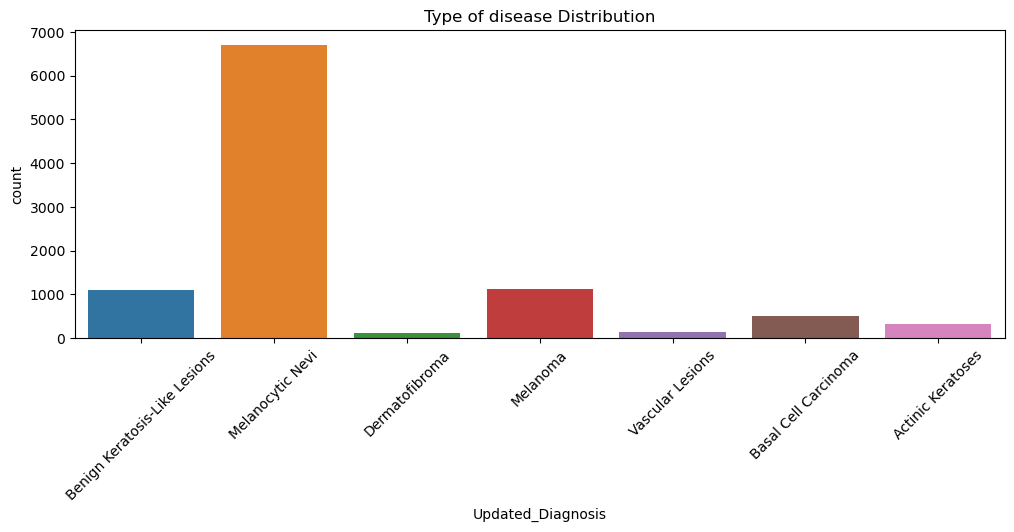

In [39]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='Updated_Diagnosis')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.savefig('disease_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

In [40]:
import os
import shutil
# Create the destination folder if it doesn't exist
if not os.path.exists(r"C:\Users\Mehul\CNN\Images"):
    os.makedirs(r"C:\Users\Mehul\CNN\Images")

# Iterate through files in folder 1 and copy them to the destination folder
for filename in os.listdir(train_images):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Specify file extensions as needed
        shutil.copy(os.path.join(train_images, filename), r"C:\Users\Mehul\CNN\Images")

# Iterate through files in folder 2 and copy them to the destination folder
for filename in os.listdir(test_images):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Specify file extensions as needed
        shutil.copy(os.path.join(test_images, filename), r"C:\Users\Mehul\CNN\Images")

In [41]:
data['Image_path'] = data['Image_Id'].apply(lambda x: os.path.join(r"C:\Users\Mehul\CNN\Images", f"{x}.jpg"))

In [42]:
data

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,C:\Users\Mehul\CNN\Images\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,C:\Users\Mehul\CNN\Images\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,C:\Users\Mehul\CNN\Images\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,C:\Users\Mehul\CNN\Images\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions,C:\Users\Mehul\CNN\Images\ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40,male,abdomen,Actinic Keratoses,C:\Users\Mehul\CNN\Images\ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40,male,abdomen,Actinic Keratoses,C:\Users\Mehul\CNN\Images\ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40,male,abdomen,Actinic Keratoses,C:\Users\Mehul\CNN\Images\ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80,male,face,Actinic Keratoses,C:\Users\Mehul\CNN\Images\ISIC_0032854.jpg


In [43]:
import os
import pandas as pd
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

# Define your augmentation pipeline
aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flip with probability 0.5
    iaa.Flipud(0.2),  # vertical flip with probability 0.2
    #iaa.Crop(percent=(0, 0.1)),  # random crop with a ratio of length and width of 0.9 to 1.0
    #iaa.Affine(rotate=(-20, 20), shear=(-10, 10), mode='edge'),  # random rotation and shear, fill with edge pixels
    iaa.MultiplyBrightness((0.8, 1.2)),  # change brightness
    #iaa.GaussianBlur(sigma=(0, 1.0)),  # Gaussian blur
    #iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # additive Gaussian noise
    #iaa.ContrastNormalization((0.8, 1.2)),  # change contrast
    #iaa.Multiply((0.8, 1.2)),  # change brightness
    iaa.Grayscale(alpha=(0.0, 1.0)),  # convert to grayscale with probability
    #iaa.CoarseDropout(0.02, size_percent=0.05, per_channel=False),  # random dropout
    #iaa.CLAHE(clip_limit=(1, 4))  # apply CLAHE
])

# Directory to save augmented images
augmented_images_dir = r'C:\Users\Mehul\CNN\Augimgs'
os.makedirs(augmented_images_dir, exist_ok=True)

# Get the class counts
class_counts = data['Diagnosis'].value_counts()
max_count = class_counts.max()

# Create an empty list to hold the balanced samples
balanced_samples = []

# Oversample each class with augmentation to match the class with the maximum count
for label in class_counts.index:
    class_subset = data[data['Diagnosis'] == label]

    if len(class_subset) < max_count:
        n_augmentations = max_count - len(class_subset)
        augmented_samples = []
        for i in range(n_augmentations):
            sample = class_subset.sample(n=1, random_state=42).iloc[0]
            img_path = sample['Image_path']
            img = io.imread(img_path)
            augmented_image = aug_pipeline(image=img)

            # Save the augmented image
            augmented_image_path = os.path.join(augmented_images_dir, f'{label}_augmented_{i}.jpg')
            io.imsave(augmented_image_path, augmented_image)

            # Store the augmented image and update the image path
            augmented_sample = sample.copy()
            augmented_sample['Image_path'] = augmented_image_path
            augmented_samples.append(augmented_sample)

        augmented_df = pd.DataFrame(augmented_samples)
        class_oversampled = pd.concat([class_subset, augmented_df], ignore_index=True)
    else:
        class_oversampled = class_subset

    balanced_samples.append(class_oversampled)

# Combine all oversampled classes into a single DataFrame
balanced_dataset = pd.concat(balanced_samples).reset_index(drop=True)

print("Dataset balanced successfully!")

Dataset balanced successfully!


In [44]:
data = balanced_dataset
data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path
0,HAM_0001751,ISIC_0024698,nv,consensus,70,male,face,Melanocytic Nevi,C:\Users\Mehul\CNN\Images\ISIC_0024698.jpg
1,HAM_0000559,ISIC_0024693,nv,follow_up,45,female,upper extremity,Melanocytic Nevi,C:\Users\Mehul\CNN\Images\ISIC_0024693.jpg
2,HAM_0004932,ISIC_0032212,nv,follow_up,45,female,foot,Melanocytic Nevi,C:\Users\Mehul\CNN\Images\ISIC_0032212.jpg
3,HAM_0004516,ISIC_0025775,nv,follow_up,45,female,neck,Melanocytic Nevi,C:\Users\Mehul\CNN\Images\ISIC_0025775.jpg
4,HAM_0006510,ISIC_0029828,nv,follow_up,55,female,lower extremity,Melanocytic Nevi,C:\Users\Mehul\CNN\Images\ISIC_0029828.jpg


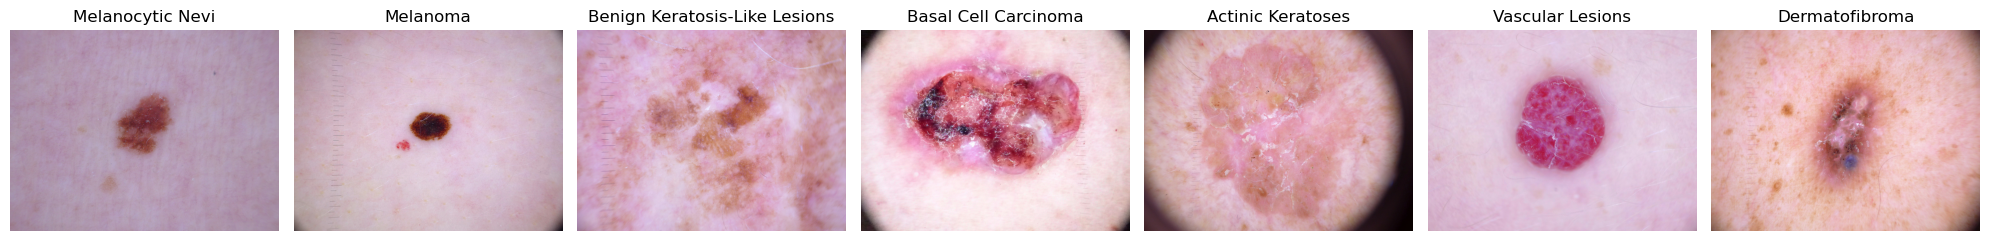

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Function to display one image per class
def display_one_image_per_class(meta_data):
    classes = meta_data['Updated_Diagnosis'].unique()
    fig, axes = plt.subplots(1, len(classes), figsize=(20, 5))
    
    for i, class_name in enumerate(classes):
        class_images = meta_data[meta_data['Updated_Diagnosis'] == class_name]['Image_path']
        if not class_images.empty:
            image_path = class_images.iloc[0]  # Select the first image of each class
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(class_name)

    plt.tight_layout()
    plt.show()

# Display one image per class from the DataFrame
display_one_image_per_class(data)

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'Region_Of_Disease' column
data['Updated_Diagnosis_Label'] = label_encoder.fit_transform(data['Updated_Diagnosis'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'Actinic Keratoses': 0, 'Basal Cell Carcinoma': 1, 'Benign Keratosis-Like Lesions': 2, 'Dermatofibroma': 3, 'Melanocytic Nevi': 4, 'Melanoma': 5, 'Vascular Lesions': 6}


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46935 entries, 0 to 46934
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Lesion_Id                46935 non-null  object
 1   Image_Id                 46935 non-null  object
 2   Diagnosis                46935 non-null  object
 3   Confirmation_Method      46935 non-null  object
 4   Age                      46935 non-null  int32 
 5   Sex                      46935 non-null  object
 6   Region_Of_Disease        46935 non-null  object
 7   Updated_Diagnosis        46935 non-null  object
 8   Image_path               46935 non-null  object
 9   Updated_Diagnosis_Label  46935 non-null  int32 
dtypes: int32(2), object(8)
memory usage: 3.2+ MB


In [48]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=['Updated_Diagnosis_Label']) 
y = data['Updated_Diagnosis_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (30038, 9)
Shape of y_train: (30038,)
Shape of X_test: (9387, 9)
Shape of y_test: (9387,)


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation and generators
train_datagen = ImageDataGenerator(
rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 30038 validated image filenames belonging to 7 classes.
Found 7510 validated image filenames belonging to 7 classes.
Found 9387 validated image filenames belonging to 7 classes.


In [52]:
images, labels = next(train_generator)
print("Image shape:", images.shape)
print("Label shape:", labels.shape)

Image shape: (32, 224, 224, 3)
Label shape: (32,)


In [53]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19,ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model without the top classification layer
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
#x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,200,007 (77.06 MB)

 Trainable params: 175,623 (686.03 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10


C:\Users\Mehul\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.32939, saving model to model_weights.keras
939/939 - 11005s - 12s/step - accuracy: 0.8614 - loss: 0.5039 - val_accuracy: 0.9248 - val_loss: 0.3294 - learning_rate: 0.0010
Epoch 2/10

Epoch 2: val_loss improved from 0.32939 to 0.30789, saving model to model_weights.keras
939/939 - 10857s - 12s/step - accuracy: 0.9057 - loss: 0.3519 - val_accuracy: 0.9242 - val_loss: 0.3079 - learning_rate: 0.0010
Epoch 3/10

Epoch 3: val_loss improved from 0.30789 to 0.27575, saving model to model_weights.keras
939/939 - 10276s - 11s/step - accuracy: 0.9095 - loss: 0.3439 - val_accuracy: 0.9253 - val_loss: 0.2758 - learning_rate: 0.0010
Epoch 4/10

Epoch 4: val_loss improved from 0.27575 to 0.27053, saving model to model_weights.keras
939/939 - 9912s - 11s/step - accuracy: 0.9135 - loss: 0.3331 - val_accuracy: 0.9248 - val_loss: 0.2705 - learning_rate: 0.0010
Epoch 5/10

Epoch 5: val_loss did not improve from 0.27053
939/939 - 10897s - 12s/step - accuracy: 0.913

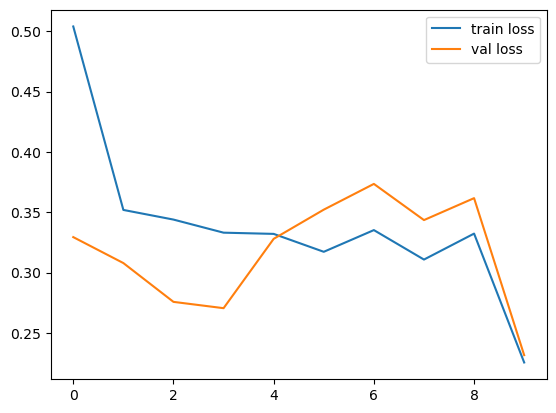

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [54]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
# fit the model
r = model.fit(train_generator, 
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[reduce_lr,early_stopping,checkpoint],
             verbose=2)
  #steps_per_epoch=len(X_train),
  #validation_steps=len(X_test)


import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [98]:
model.save('facefeatures_new_model.keras')

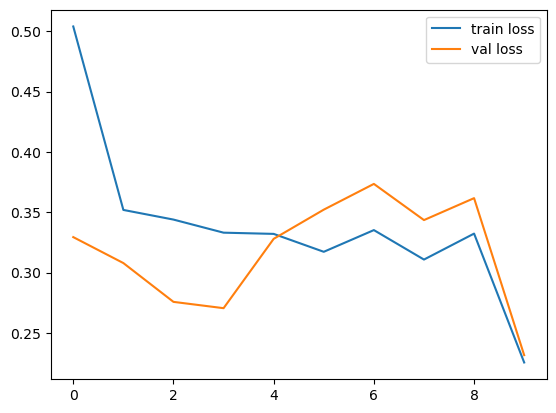

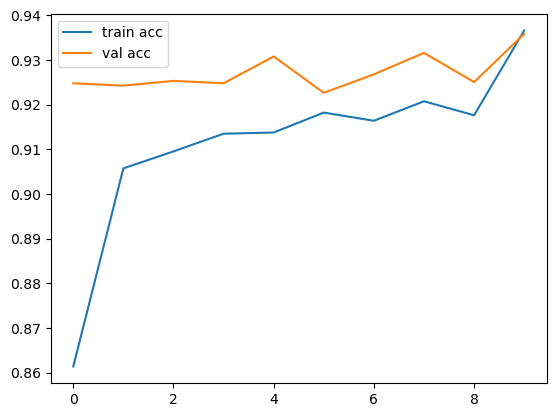

<Figure size 640x480 with 0 Axes>

In [87]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

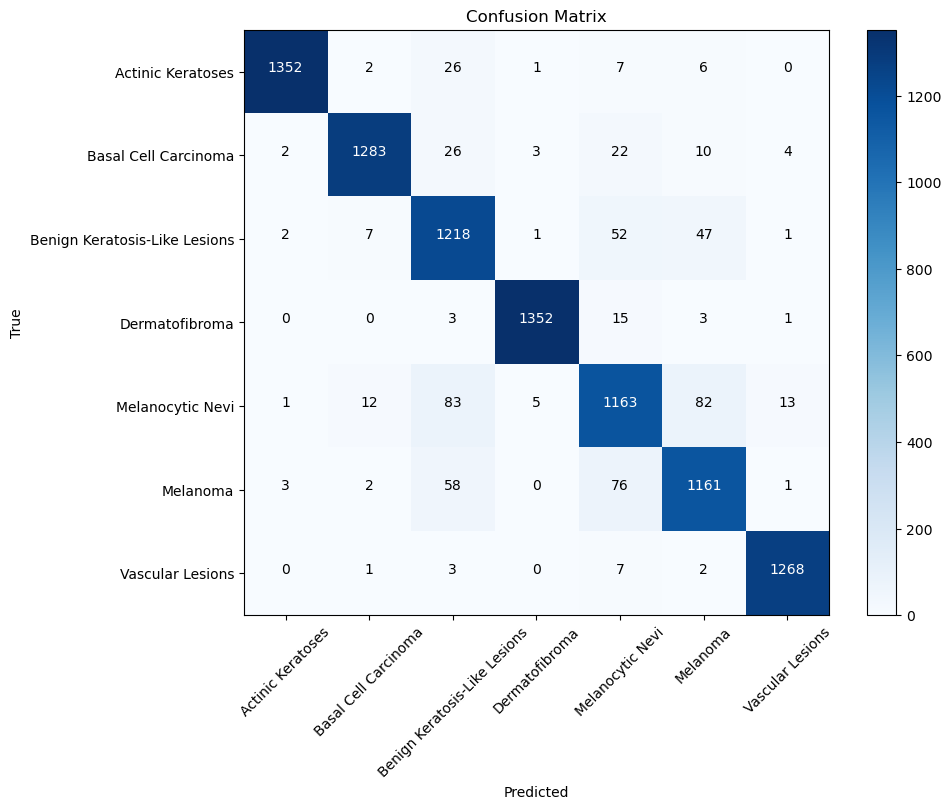

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


true_classes = np.array(test_generator.classes)
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")
class_labels = list(val_generator.class_indices.keys())

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add text annotations to the heatmap
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()